In [158]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import numpy as np
from os.path import join
from numpy import genfromtxt
from plots import _plot
from train import Results

In [168]:
exp='lenk'
if exp=='exp1':
    folder = 'exps/exp1/grid_searchexp1w_bar4taskstd1y_snr10dim30over10seedsis[\'fista\', \'subgd\', \'ssubgd\']ist[\'fista\', \'subgd\', \'ssubgd\']n10val_perc0.0-2019-01-31 13:23:14.322002'
    T=500
    x_right=500
elif exp =='lenk':
    folder = 'exps/lenk/grid_searchexpLenkRegn_tasks_train100n_tasks_val40n_tasks180dim14over10seedsis[\'ssubgd\', \'fista\']ist[\'ssubgd\', \'fista\']n8val_perc0.0-2019-02-04 12:48:24.438609'
    folder = 'exps/lenk/grid_searchexpLenkn_tasks_train100n_tasks_val40n_tasks180dim14over10seedsis[\'ssubgd\', \'subgd\']ist[\'ssubgd\', \'subgd\']n8val_perc0.0-2019-02-05 17:17:35.437034'
    T=100
    x_right=100

title=exp
metric='accuracy'
y_label='Test Error'
save=True
save_dir = 'plotsf'

if not save:
    save_dir=None

files = os.listdir(folder)
def get_file(starts_with):
    for f in files:
        if f.startswith(metric+'-'+starts_with):
            return genfromtxt(join(folder, f), delimiter=',')
    return None
result_dict = {}
def put_in_dict(starts_with, name, color=None):
    metrics = {'loss': get_file(starts_with=starts_with)}
    r = Results(None, False, False, name=name)
    r.add_metrics(metrics)
    r.color = color
    result_dict[name] = r

In [169]:
erm_alg='subgd'
put_in_dict('ITL-ts'+erm_alg, 'ITL ERM', 'black')
put_in_dict('ITL-tsssubgd', 'ITL SGD', 'darkred')

put_in_dict('LTL-trssubgdtsssubgd', 'LTL SGD-SGD', 'c')
put_in_dict('LTL-tr'+erm_alg+'tsssubgd', 'LTL ERM-SGD', 'b')
put_in_dict('LTL-trssubgdts'+erm_alg, 'LTL SGD-ERM', 'm')
put_in_dict('LTL-tr'+erm_alg+'ts'+erm_alg, 'LTL ERM-ERM', 'red')

if exp != 'lenk':
    put_in_dict('MEAN-ts'+erm_alg, 'MEAN ERM', 'green')
    put_in_dict('MEAN-tsssubgd', 'MEAN SGD', 'orange')

----------loss-ITL ERM-loss mean std 0.6743750000000001 0.01970485346304306
----------loss-ITL SGD-loss mean std 0.60875 0.03259001956120922
----------loss-LTL SGD-SGD-loss mean std 0.7140625 0.026672566079213308
----------loss-LTL ERM-SGD-loss mean std 0.7015625 0.02622953070967915
----------loss-LTL SGD-ERM-loss mean std 0.728125 0.03165364315525149
----------loss-LTL ERM-ERM-loss mean std 0.73 0.03020761493398642


In [170]:
def plot_resultsList(T, results_dict, y_label='', title='', save_dir_path=None, show_plot=True,
                     filename='metric_test'):

    alpha = 0.1
    size=1.5
    my_dpi=300
    plt.figure(figsize=(size*7, size*4))
    plt.tight_layout()
    
    x = list(range(T))
    for _, results in results_dict.items():
        _plot(results.metrics, '', alpha, x=x, label=results.name, color=results.color)

    plt.title(title)
    plt.ylabel(y_label)
    plt.xlabel('T')
    plt.xlim(right=x_right, left=x[0])
    plt.legend()

    if save_dir_path is not None:
        pylab.savefig(os.path.join(save_dir_path, filename+'.png'), bbox_inches = "tight", dpi=my_dpi)
        #pylab.savefig(os.path.join(save_dir_path, filename+'.pgf'))
        #tikz_save(os.path.join(save_dir_path, filename+'.txt'))
    if show_plot:
        plt.show()
    plt.close()

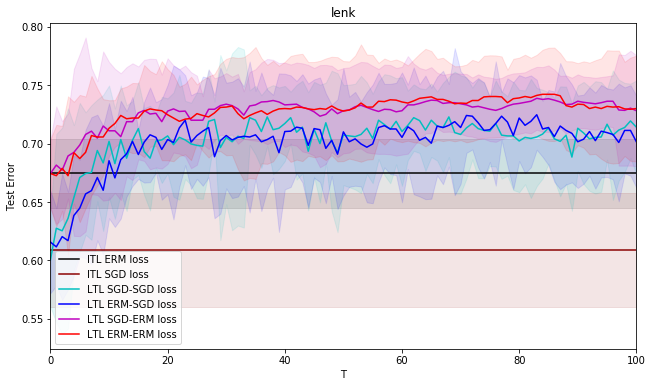

In [171]:
plot_resultsList(T+1, result_dict, y_label, title, save_dir, True, filename=exp+metric+'ERMvsSGD-T'+str(x_right))